In [1]:
import pandas as pd
import numpy as np

## Content Dataset

In [63]:
content_data = pd.read_csv('C://Users/mughd/Desktop/Content.csv')

In [64]:
content_data.head(3)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...


In [65]:
content_columns = content_data.columns

for column in content_columns:
    nan_count = content_data[column].isna().sum()
    print(f"Column '{column}' : {nan_count} NaN values.")

Column 'Unnamed: 0' : 0 NaN values.
Column 'Content ID' : 0 NaN values.
Column 'User ID' : 0 NaN values.
Column 'Type' : 0 NaN values.
Column 'Category' : 0 NaN values.
Column 'URL' : 199 NaN values.


In [66]:
content_data = content_data.drop('URL', axis = 1)
content_data = content_data.drop('Unnamed: 0', axis = 1)

In [67]:
content_data = content_data.drop('User ID', axis = 1)

In [68]:
content_data.rename(columns={'Type':'content_type'}, inplace=True)

In [69]:
content_data.head(3)

,Content ID,content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating


## Reactions Dataset

In [70]:
reactions_data = pd.read_csv('C://Users/mughd/Desktop/Reactions.csv')

In [71]:
reactions_data.head(3)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


In [72]:
reaction_columns = reactions_data.columns

In [73]:
for column in reaction_columns:
    nan_count = reactions_data[column].isna().sum()
    print(f"Column {column} : {nan_count} NA values.")

Column Unnamed: 0 : 0 NA values.
Column Content ID : 0 NA values.
Column User ID : 3019 NA values.
Column Type : 980 NA values.
Column Datetime : 0 NA values.


In [74]:
reactions_data = reactions_data.drop('Datetime', axis = 1)
reactions_data = reactions_data.drop('Unnamed: 0', axis = 1)
reactions_data = reactions_data.drop('User ID', axis = 1)

In [75]:
reactions_data.dropna(subset = ['Type'], inplace = True)

In [76]:
reactions_data.rename(columns={'Type':'emoji_type'}, inplace = True)

In [77]:
reactions_data.head(3)

,Content ID,emoji_type
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared


## Reaction Types Dataset

In [78]:
types_data = pd.read_csv('C://Users/mughd/Desktop/ReactionTypes.csv')

In [79]:
types_data.head(3)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0


In [80]:
types_data = types_data.drop('Unnamed: 0', axis = 1)

In [81]:
types_columns = types_data.columns

In [82]:
for column in types_columns:
    nan_count = types_data[column].isna().sum()
    print(f"Column {column} : {nan_count} NA values.")

Column Type : 0 NA values.
Column Sentiment : 0 NA values.
Column Score : 0 NA values.


In [83]:
types_data.rename(columns={'Type':'emoji_type'}, inplace=True)

In [84]:
types_data.head(3)

,emoji_type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


## Merging Datasets

In [85]:
data1 = pd.merge(content_data, reactions_data, on='Content ID')

In [86]:
data1.head(3)

,Content ID,content_type,Category,emoji_type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared


In [87]:
data = pd.merge(data1, types_data, on = 'emoji_type')

In [88]:
data['Category'] = data['Category'].str.replace('"',"").str.lower()

In [89]:
data.head(3)

,Content ID,content_type,Category,emoji_type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0


In [90]:
data.to_excel('clean_dataset.xlsx', index=False)

## Data Analysis

#### Discover the top 5 categories with the largest popularity

In [91]:
group = data.groupby(['Content ID', 'Category'])['Score'].sum().reset_index()

In [92]:
group

,Content ID,Category,Score
0,004e820e-49c3-4ba2-9d02-62db0065410c,tennis,60
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,healthy eating,2013
2,01396602-c759-4a17-90f0-8f9b3ca11b30,tennis,1303
3,019b61f4-926c-438e-adaf-6119c5eab752,fitness,454
4,01ab84dd-6364-4236-abbb-3f237db77180,food,15
...,...,...,...
957,fdca8d15-966b-4825-8133-1fafc5c1f9fc,dogs,1198
958,fe06b730-b1f8-4f55-af1a-52487d8f1ec6,animals,1039
959,fea8d77c-fd0b-4678-868f-fbae567642f3,science,287
960,fea9077f-2fe7-43bd-aaef-dc2619988d94,culture,200


In [93]:
categories_popularity_data = group.groupby(['Category']).sum().sort_values('Score', ascending=False).reset_index()

In [94]:
categories_popularity_data.to_excel('categories_popularity.xlsx', index=False)

In [95]:
top5_categories_data = categories_popularity_data.sort_values('Score',ascending = False).head(5)

In [96]:
top5_categories_data.to_excel('top5.xlsx', index=False)

## Visualization

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

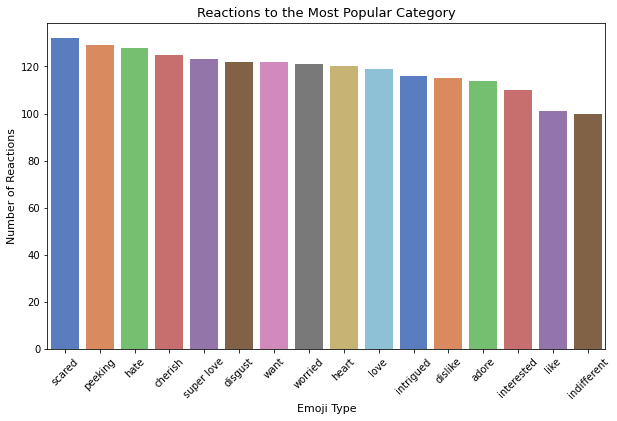

In [133]:
category_reactions = data[data['Category'] == data['Category'].value_counts().idxmax()]
reactions_count = category_reactions['emoji_type'].value_counts()

colors = sns.color_palette('muted')

plt.figure(figsize=(10, 6))
sns.barplot(x=reactions_count.index, y=reactions_count.values, palette=colors)

plt.xlabel('Emoji Type', size=11)
plt.ylabel('Number of Reactions', size=11)
plt.title('Reactions to the Most Popular Category', size = 13)
plt.xticks(rotation=45)

plt.savefig('reactions_most_popular.png', bbox_inches='tight')
plt.show()

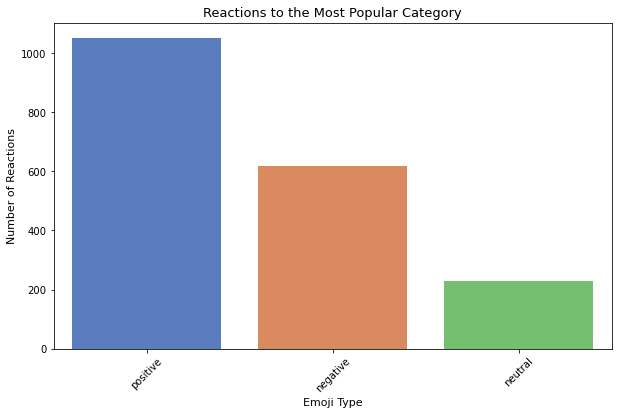

In [132]:
category_reactions = data[data['Category'] == data['Category'].value_counts().idxmax()]
sentiments_count = category_reactions['Sentiment'].value_counts()

colors = sns.color_palette('muted')

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiments_count.index, y=sentiments_count.values, palette=colors)

plt.xlabel('Emoji Type', size=11)
plt.ylabel('Number of Reactions', size=11)
plt.title('Reactions to the Most Popular Category', size = 13)
plt.xticks(rotation=45)

plt.savefig('sentiments_popular.png', bbox_inches='tight')
plt.show()

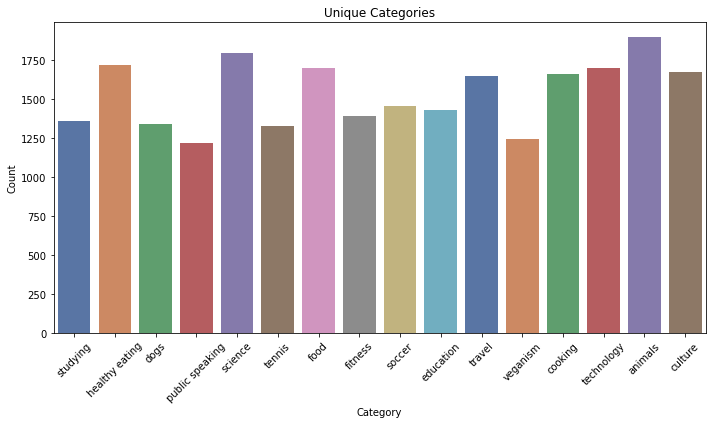

In [131]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette('deep')
sns.countplot(data=data, x='Category', palette = colors)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Unique Categories')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('unique_categories.png', bbox_inches='tight')
plt.show()